# Load Functions

## 0. imports

In [ ]:
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
import mne

from utils import *
from eeg import compute_eeg_pipeline, test_eeg_pipeline
from ecg_qc import ecg_qc 
from eda_qc import eda_qc
from rsp_qc import *
from mic_qc import *
from lsl_problem import *
from webcam_qc import webcam_qc

# subject = "P5029423"
# # xdf_filename = f'/Users/bryan.gonzalez/CUNY_subs/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
# xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'


In [2]:
subject = "P5287460"
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'

# 1. EEG

In [ ]:
#Compute the eeg vars
eeg_vars = compute_eeg_pipeline(xdf_filename)

# 2. ECG

In [ ]:
ecg_vars

In [ ]:
[ecg_vars, ecg_plt] = ecg_qc(xdf_filename)


# 3. EDA

In [ ]:
[eda_vars, eda_plt1, eda_plt2] = eda_qc(xdf_filename)

In [ ]:
# Sample data for the table
data = [
    ["variable", "value"],
    ["bad channels before", str(eeg_vars["bad_channels_before"])],
    ["interpolated channels", str(eeg_vars["interpolated_channels"])],
    ["bad channels after", str(eeg_vars["bad_channels_after"])],
   ["percentage of good data", str(eeg_vars["percent_good"])],
]

# 4. RSP

2025-05-09 15:36:07,066 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-09 15:36:09,700 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-09 15:36:09,719 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-09 15:36:09,749 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-09 15:36:09,993 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-09 15:36:10,010 - pyxdf.pyxdf - INFO -   performing jitter removal...


Effective sampling rate: 494.908
Signal to Noise Ratio: 6.459
Breath amplitude mean: 0.170
Breath amplitude std: 0.216
Breath amplitude range: 0.026 - 2.001
Respiration rate mean: 20.768
Respiration rate std: 2.928
Respiration rate range: 6.705 - 28.010
Peak to peak interval mean: 2.366
Peak to peak interval std: 1.540
Peak to peak interval range: 0.486 - 25.796
Baseline drift: 0.057
Autocorrelation at typical breath cycle: 0.081


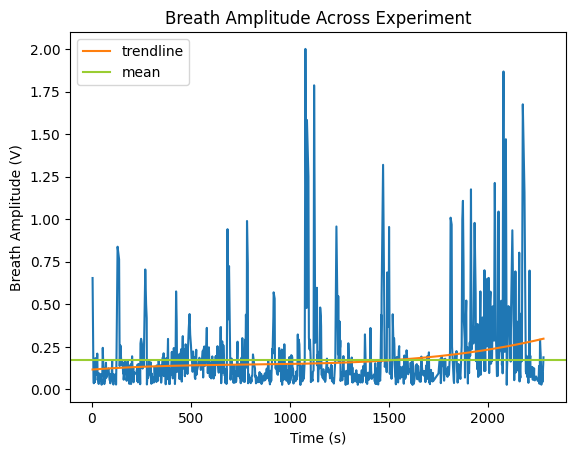

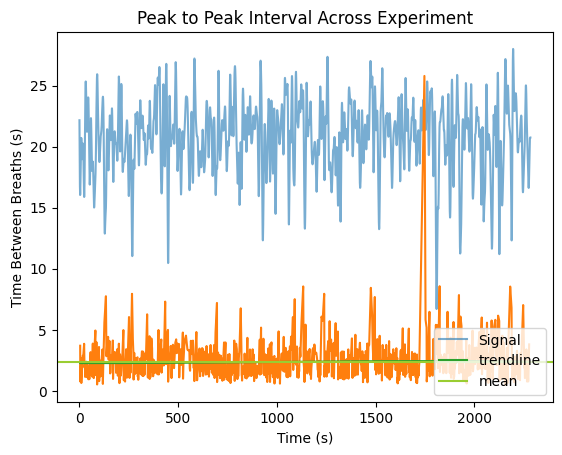

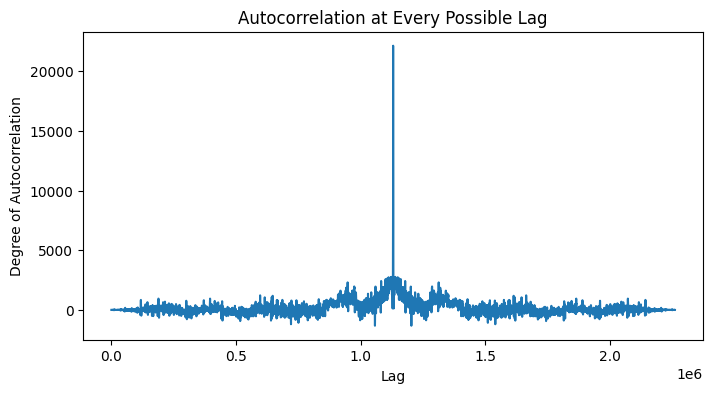

In [3]:
rsp_vars = rsp_qc(xdf_filename)

In [4]:
rsp_vars

{'sampling_rate': np.float64(494.9080841125127),
 'rsp_snr': np.float64(6.4592950633914805),
 'breath_amplitude_mean': np.float64(0.17026324452494762),
 'breath_amplitude_std': np.float64(0.21641422344415842),
 'breath_amplitude_range': '0.026 - 2.001',
 'rsp_rate_mean': np.float64(20.767729722710772),
 'rsp_rate_std': np.float64(2.9282710556409492),
 'rsp_rate_range': '6.705 - 28.010',
 'ptp_mean': np.float64(2.3658041838797823),
 'ptp_std': np.float64(1.5402879384613746),
 'ptp_range': '0.486 - 25.796',
 'baseline_drift': np.float64(0.056999690807901786),
 'autocorrelation': np.float64(0.08105735273257382)}

# 5. Mic

In [2]:
mic_vars = mic_qc(xdf_filename)

NameError: name 'mic_qc' is not defined

In [3]:
# Webcam

In [4]:
vars = webcam_qc(xdf_filename==xdf_filename,
                video_file=video_filename, task='RestingState')

NameError: name 'webcam_qc' is not defined

In [5]:
# Sample data for the table
data = [
    ["variable", "value"],
    ["bad channels before", str(eeg_vars["bad_channels_before"])],
    ["interpolated channels", str(eeg_vars["interpolated_channels"])],
    ["bad channels after", str(eeg_vars["bad_channels_after"])],
   ["percentage of good data", str(eeg_vars["percent_good"])],
]

NameError: name 'eeg_vars' is not defined

# Stream Durations 

### functions are in utils.py (but should be called in the report)

In [4]:
get_durations(ExperimentPart='Experiment', xdf_path=xdf_filename)

2025-05-14 10:15:02,209 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:15:04,722 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:15:04,740 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:15:04,747 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:15:04,957 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:15:04,970 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:15:04,971 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:15:07,272 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:15:07,296 - pyxdf.pyxdf - INFO -   performin

mic is shorter than expected for Experiment by 360.68 seconds

Experiment DataFrame


,stream,duration,mm:ss,percent
2,mic,1808.2050,0:30:08,83.37%
3,cam,2168.8410,0:36:09,100.0%
0,et,2168.8770,0:36:09,100.0%
1,ps,2168.8780,0:36:09,100.0%
4,eeg,2168.8800,0:36:09,100.0%
5,expected,2168.8808,0:36:09,100.0%


In [5]:
get_durations('RestingState', xdf_filename)

2025-05-14 10:17:07,683 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:17:09,074 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:17:09,088 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:17:09,095 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:17:09,358 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:17:09,372 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:17:09,373 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:17:11,289 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:17:11,310 - pyxdf.pyxdf - INFO -   performin


RestingState DataFrame


,stream,duration,mm:ss,percent
3,cam,299.9630,0:05:00,99.99%
0,et,299.9940,0:05:00,100.0%
4,eeg,299.9980,0:05:00,100.0%
1,ps,299.9990,0:05:00,100.0%
5,expected,299.9996,0:05:00,100.0%


In [ ]:
# i wont run these but they are here for reference
# get_durations('CampFriend', xdf_filename)
# get_durations('SocialTask', xdf_filename)

In [7]:
whole_durations(xdf_filename)

2025-05-14 10:18:58,793 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:18:59,429 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:18:59,443 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:18:59,449 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:18:59,729 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:18:59,744 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 10:18:59,745 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 10:19:01,615 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 10:19:01,636 - pyxdf.pyxdf - INFO -   performin

mic is shorter than expected by 421.55 seconds


,stream,duration,mm:ss,percent
2,mic,1863.106,0:31:03,81.55%
3,cam,2257.440,0:37:37,98.81%
0,et,2257.455,0:37:37,98.81%
1,ps,2284.446,0:38:04,99.99%
4,eeg,2284.655,0:38:05,100.0%


# LSL Problem

In [6]:
lsl_vars = lsl_problem(xdf_filename)

2025-05-14 13:31:20,373 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 13:32:08,056 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 13:32:08,329 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 13:32:25,766 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 13:32:27,962 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 13:32:27,975 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-05-14 13:32:27,979 - pyxdf.pyxdf - INFO - Importing XDF file /Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5287460/sub-P5287460_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-05-14 13:32:28,509 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-05-14 13:32:28,526 - pyxdf.pyxdf - INFO -   performin

    subject modality  num_losses percent_lost
0  P5287460       ps           1       1.033%
    subject modality  num_losses percent_lost
0  P5287460       ps           1       1.085%


In [5]:
pprint(lsl_vars)

{'loss_before_social_task':     subject modality  num_losses percent_lost
0  P5287460       ps           1       1.085%,
 'percent_loss':     subject modality  num_losses percent_lost
0  P5287460       ps           1       1.033%}


# Report

## 1. Set up Document

In [ ]:


# Set up the document
doc = SimpleDocTemplate("example_report.pdf", pagesize=LETTER)
styles = getSampleStyleSheet()
story = []

# Add a title
title = Paragraph(f"Subject Report: {subject}", styles["Title"])
story.append(title)
story.append(Spacer(1, 20))

# Add a paragraph
text = f"""
Collection Date: {get_collection_date(xdf_filename)} 
"""
paragraph = Paragraph(text, styles["BodyText"])
story.append(paragraph)
story.append(Spacer(1, 20))




In [ ]:
# Add a subtitle
subtitle = Paragraph(f"EEG", styles["Heading2"], )
story.append(subtitle)
story.append(Spacer(1, 5))

# Add a paragraph
text = f"""
Data preprocessed by performing <b>line noise removal</b>, <b>robust referencing</b>, and <b>bad channel detection/interpolation</b> using PyPrep pipeline. First, the pipeline applies a notch filter at 60 Hz and its harmonics to remove power line noise. Then, it performs <b>robust average referencing</b>, where it detects bad channels, interpolates them using surrounding signals, and computes a median-based reference across EEG channels. This ensures a stable reference even in the presence of noisy electrodes. The final output is a cleaned EEG dataset with a consistent reference, ready for further analysis.
"""

paragraph = Paragraph(text, styles["BodyText"], )
story.append(paragraph)
story.append(Spacer(1, 20))

## Computer the EEG variables (will take time)

In [ ]:
# add an image
from reportlab.lib.units import inch
from reportlab.platypus import Image
image = Image("/Users/bryan.gonzalez/MOBI_QC/src/MOBI_QC/report_images/P5029423_eeg_annotations.png", 7*inch, 3*inch)
image.hAlign = 'CENTER'
story.append(image)

In [ ]:
story.append(Spacer(1, 20))

In [ ]:



# Define the table style to make all borders white
style = TableStyle([
    ('GRID', (0,0), (-1,-1), 1, colors.white),  # All grid lines white
    ('BOX', (0,0), (-1,-1), 1, colors.white),   # Outer box white
    ('INNERGRID', (0,0), (-1,-1), 1, colors.white)  # Inner grid white
])
# Create the table
table = Table(data, style=style)
# Apply style
#table.setStyle(style)
story.append(table)
#story.append(Spacer(1, 20))

In [ ]:
# Build the PDF
doc.build(story)

In [ ]:
table